In [1]:
%load_ext autoreload
%autoreload 2
from geolifeclef.utils import get_spark
from pyspark.sql import functions as F
from geolifeclef.torch.raster.data import RasterDataModel


spark = get_spark(memory="24g")

/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/spark/spark_dataset_converter.py:28: FutureWarning: pyarrow.LocalFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  from pyarrow import LocalFileSystem
24/05/17 10:33:27 WARN Utils: Your hostname, daphne-major resolves to a loopback address: 127.0.1.1; using 172.28.199.217 instead (on interface eth0)
24/05/17 10:33:27 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/17 10:33:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... us

In [2]:
local_root = "/mnt/data/geolifeclef-2024/data"
dm = RasterDataModel(
    spark,
    f"{local_root}/processed/metadata_clean/v2",
    [
        f"{local_root}/processed/tiles/pa-train/satellite/v3",
    ],
    ["red", "green", "blue", "nir"],
)
dm.setup()

/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/fs_utils.py:88: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem = pyarrow.localfs
Converting floating-point columns to float32
Converting floating-point columns to float32                                    
The median size 11390479 B (< 50 MB) of the parquet files is too small. Total size: 364465999 B. Increase the median file size by calling df.repartition(n) or df.coalesce(n), which might help improve the performance. Parquet files: file:///mnt/data/tmp/20240517103522-appid-local-1715967209203-80d0a879-3f03-4eb2-b7e8-ae74a76a4b79/part-00026-c3844f1b-52fd-4987-b8ce-e44b70d1e6db-c000.parquet, ...


In [3]:
dm.train_data.count(), dm.valid_data.count()

(1334401, 149236)

In [4]:
dm.train_data.printSchema()
dm.train_data.show(1, vertical=True, truncate=80)

root
 |-- surveyId: integer (nullable = true)
 |-- labels_sp: vector (nullable = true)
 |-- dataset: string (nullable = true)
 |-- sample_id: long (nullable = true)
 |-- red: vector (nullable = true)
 |-- green: vector (nullable = true)
 |-- blue: vector (nullable = true)
 |-- nir: vector (nullable = true)

-RECORD 0-------------------------------------------------------------------------------------
 surveyId  | 947147                                                                           
 labels_sp | (11255,[812,2608,2891,3375,4675,5868,6915,7230,7871,10073,11140,11188],[1.0,1... 
 dataset   | pa_train                                                                         
 sample_id | 27                                                                               
 red       | [5930736.0,-85145.953125,-238.35287475585938,54020.87890625,3581.513916015625... 
 green     | [5799276.0,-113671.0390625,21665.00390625,21910.51953125,-14805.201171875,349... 
 blue      | [5039208.0,-8

In [5]:
batch = next(dm.train_dataloader())
batch

/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/fs_utils.py:88: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem = pyarrow.localfs
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/etl/dataset_metadata.py:402: FutureWarning: Specifying the 'metadata_nthreads' argument is deprecated as of pyarrow 8.0.0, and the argument will be removed in a future version
  dataset = pq.ParquetDataset(path_or_paths, filesystem=fs, validate_schema=False, metadata_nthreads=10)
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/etl/dataset_metadata.py:362: FutureWarning: 'ParquetDataset.common_metadata' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version.
  if not dataset.common_metadata:
/home/anthony/omscs/dsgt-clef/venv/lib/python3.11/site-packages/petastorm/reader.py:420: FutureWarning: Specifying the 'metadata_nthreads' argu

{'features': tensor([[[[ 82.8185,  82.8482,  82.9067,  ...,  87.1719,  87.1965,  87.2087],
           [ 82.6608,  82.6903,  82.7486,  ...,  87.1397,  87.1671,  87.1806],
           [ 82.3477,  82.3770,  82.4347,  ...,  87.0729,  87.1058,  87.1222],
           ...,
           [ 58.4598,  58.4787,  58.5173,  ...,  94.9199,  94.4651,  94.2342],
           [ 58.3798,  58.3980,  58.4353,  ...,  95.4265,  94.9759,  94.7471],
           [ 58.3392,  58.3570,  58.3936,  ...,  95.6842,  95.2358,  95.0080]],
 
          [[ 93.8715,  93.9113,  93.9896,  ...,  88.3501,  88.3873,  88.4061],
           [ 93.6850,  93.7246,  93.8026,  ...,  88.3765,  88.4157,  88.4354],
           [ 93.3153,  93.3546,  93.4319,  ...,  88.4266,  88.4696,  88.4913],
           ...,
           [ 70.3973,  70.4140,  70.4478,  ...,  92.8860,  92.5991,  92.4535],
           [ 70.3152,  70.3317,  70.3653,  ...,  93.2477,  92.9649,  92.8213],
           [ 70.2735,  70.2900,  70.3233,  ...,  93.4316,  93.1510,  93.0085]],
 
  

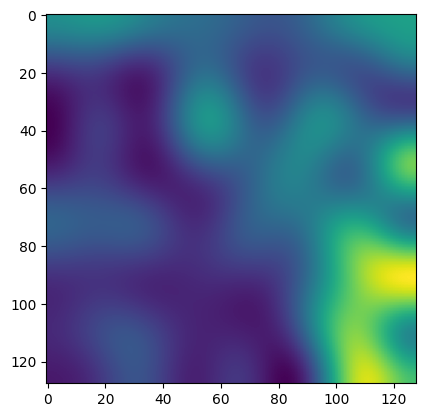

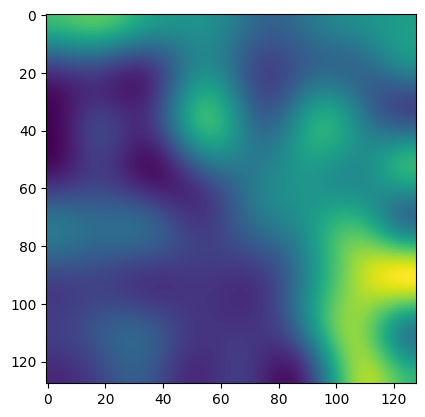

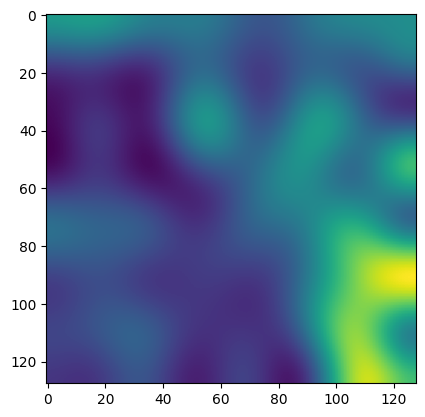

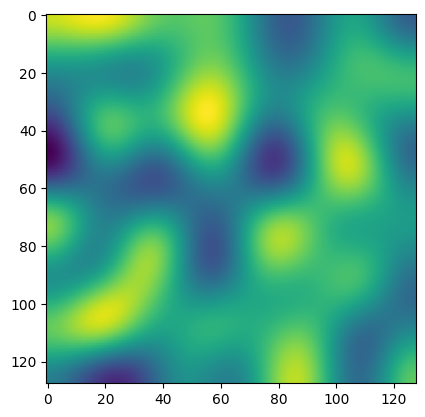

In [10]:
import matplotlib.pyplot as plt

batch["features"].shape
for i in range(4):
    img = batch["features"][0][i]
    plt.imshow(img)
    plt.show()